In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Langkah 1: Load dan Preprocess Data (MNIST)

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()  # Ambil data tanpa label
x_train = x_train.astype('float32') / 255.  # Normalisasi 0-1
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))  # Flatten jadi 784 fitur
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(f"Shape data train: {x_train.shape}, test: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape data train: (60000, 784), test: (10000, 784)


# Langkah 2: Bangun Model Autoencoder

In [5]:
input_dim = x_train.shape[1]  # 784 untuk MNIST
encoding_dim = 32  # Ukuran latent space (fitur yang diekstrak), bisa diubah

# Input layer
input_img = Input(shape=(input_dim,))

# Encoder: Kurangi dimensi
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Latent space

# Decoder: Rekonstruksi
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)  # Output sigmoid untuk 0-1

# Full Autoencoder Model
autoencoder = Model(input_img, decoded)

# Encoder Model (untuk ekstraksi fitur nanti)
encoder = Model(input_img, encoded)

# Compile model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
autoencoder.summary()  # Tampilkan arsitektur model

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

# Langkah 3: Train Model

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0952 - val_loss: 0.0360
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0329 - val_loss: 0.0245
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0240 - val_loss: 0.0210
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0207 - val_loss: 0.0185
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0185 - val_loss: 0.0173
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0172 - val_loss: 0.0161
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0162 - val_loss: 0.0153
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0154 - val_loss: 0.0145
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0147 - val_loss: 0.0139
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0141 - val_loss: 0.0137
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0136 - val_loss: 0.0129
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/ste

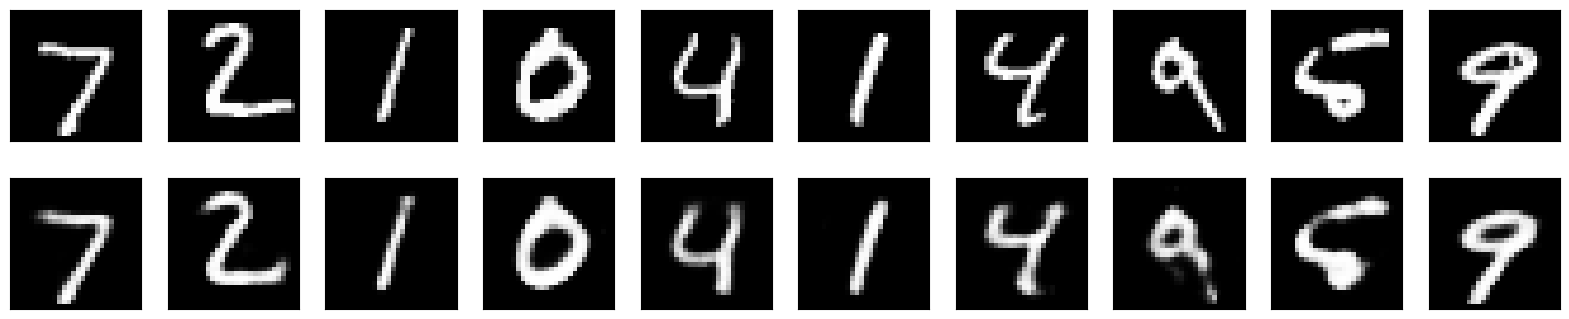

Contoh fitur diekstrak dari gambar pertama:
[19.854177   4.0651226  0.        11.318551  12.059261   0.
 16.25081   14.107489  14.093858   0.         3.0899663 15.883449
 10.517969   7.631336   0.         0.         7.027105   0.
  9.199175   5.501591  15.0188265  6.591997   6.625065  21.94705
  9.268507  10.182465   0.        14.995055  15.093361  12.3838625
 18.423468  11.850161 ]


In [6]:
autoencoder.fit(x_train, x_train,  # Input dan target sama (rekonstruksi)
                epochs=50,  # Bisa kurangi kalau lama
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Langkah 4: Ekstraksi Fitur Pakai Encoder
encoded_imgs = encoder.predict(x_test)  # Ekstrak fitur dari test data
print(f"Shape fitur yang diekstrak: {encoded_imgs.shape}")  # Harusnya (10000, 32)

# Langkah 5: Evaluasi (Visualisasi Rekonstruksi)
decoded_imgs = autoencoder.predict(x_test)  # Rekonstruksi test data

# Plot 10 gambar asli vs rekonstruksi
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Gambar asli
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Gambar rekonstruksi
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Contoh fitur yang diekstrak (cetak 1 sampel)
print("Contoh fitur diekstrak dari gambar pertama:")
print(encoded_imgs[0])